In [3]:
import pandas as pd
from pandas import read_excel

In [4]:
!pip install gdelt

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
class GET_DATA(object):
    def __init__(self):
        global logging
        import logging

    
    def Peace(self):
        """
        This is a function to pull the most updated peace data modified from https://www.kaggle.com/kretes/gpi2008-2016

        Global Peace Index (GPI) measures the relative position of nations' and regions' peacefulness.
        The GPI ranks 163 independent states and territories (99.7 per cent of the world’s population)
        according to their levels of peacefulness. In the past decade, the GPI has presented trends of 
        increased global violence and less peacefulness.

        The lower the number indicates more peace in the region.
        """
        import requests
        import re
        from bs4 import BeautifulSoup
        response = requests.get(url='https://en.wikipedia.org/wiki/Global_Peace_Index')
        soup = BeautifulSoup(response.text, 'html.parser')
        base_year = 2018        #latest year
        years = 9               #number of years to get data
        def get_countries_by_gpi():
            i = 1
            for table in soup.find_all('table', re.compile('wikitable sortable')):
                if table.find_all('th')[0].get_text() == 'Country\n':
                    for tr in table.find_all('tr'):
                        country_name = tr.find_all('a')[0].get_text()
                        if not country_name.startswith('['):
                            row = {'country': country_name}
                            for year, index in zip(range(base_year-years+1,base_year+1),range(2*(years),0,-2)):
                                score = tr.find_all('td')[index].get_text()
                                if score != '' and score != '\n':
                                    row['score_%s' % year] = float(score)
                            yield row

        import pandas as pd
        gpi = pd.DataFrame.from_dict(list(get_countries_by_gpi()))
        # print(gpi)
        gpi.to_csv('gpi_%s-%s.csv' % (base_year-years+1,base_year),index=False)
        return(gpi)    

    
    def Trade(self):
        """
        WITS Trade Stats is a database created by aggregating data from UN COMTRADE and UNCTAD TRAINS database. 
        It provides information on bilateral trade exports, imports and tariffs for over 180 countries and regions.
        """        
        import logging
        logging.basicConfig(filename="test.log", level=logging.DEBUG)
        file_path = "590PR_final_datasets"
        file_name = "wits_en_trade_summary_allcountries_allyears.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        for name in zipfile.ZipFile.infolist(zf):
            logging.debug(name.filename)
            try:
                df.append(pd.read_csv(zf.open(name.filename), header=0 ))
            except:
                pass
        frame = pd.concat(df, axis=0, ignore_index=True)
        return frame
    
    
    def Hunger(self):
        file_path = "590PR_final_datasets"
        file_name = "Hunger.csv"
        import pandas as pd
        df_hunger = pd.read_csv(file_path + "/" + file_name, na_values = '\t', sep = '\t', header = 0)
        #display(df_hunger)
        list = []
        list.append(df_hunger['Country Name'])
        for i in range(2009, 2019):
            year = str(i)
            df = df_hunger[year]
            list.append(df)
        df_new_hunger = pd.concat(list,axis = 1)
        return df_new_hunger
    
    
    def Unemployment(self):
        file_path = "590PR_final_datasets"
        file_name = "unemployment.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df

    
    def Suicide(self):
        file_path = "590PR_final_datasets"
        file_name = "suicide-rates-overview-1985-to-2016.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df


    def Freedom(self):
        file_path = "590PR_final_datasets"
        file_name = "the-human-freedom-index.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df

    
    def Happiness(self):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "world-happiness-report.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        happy = {}
        for name in zipfile.ZipFile.infolist(zf):
            happy[name.filename] = pd.read_csv(zf.open(name.filename))
        return happy

    
    def GDELT(self, start, end):
        """
        The GDELT Project is the largest, most comprehensive, and highest resolution open database of human society ever created. 
        Just the 2015 data alone records nearly three quarters of a trillion emotional snapshots and more than 1.5 billion location 
        references, while its total archives span more than 215 years, making it one of the largest open-access spatio-temporal 
        datasets in existance and pushing the boundaries of "big data" study of global human society. Its Global Knowledge Graph 
        connects the world's people, organizations, locations, themes, counts, images and emotions into a single holistic network 
        over the entire planet.
        
        This is Gdelt 2.0 (supports from the date after Feb, 2015)
        This function pull the events ids and the country it takes place
        Please input the date in the format of 'yyyy mm dd'.
        
        This function use a package from https://github.com/linwoodc3/gdeltPyR
        """
        import gdelt
        gd = gdelt.gdelt(version=2)
        results = gd.Search([start,end],table='events',coverage=True,translation=False)
        return (results[['GLOBALEVENTID','ActionGeo_FullName']])

    
    def UNODC_crime(self, sheet = None):
        """
        Crime data from UNODC including 
        'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft',
        'Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'
        or type 'ALL' to get all data.
        """
        import pandas as pd
        from pandas import read_excel
#         sheet = input("Please choose crime report from the following categories\n'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft','Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'")         
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "data-and-metadata-from-crime-victimisation-surveys-2004-2014-xlsx-1.xlsx"
        self.dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 12)
#         logging.debug(self.dfs)
#         logging.debug(self.dfs.keys())
        return self.dfs

    def Poverty(self, sheet = None):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "PovStats_csv.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        pov = {}
        for name in zipfile.ZipFile.infolist(zf):
#             logging.debug(name.filename)
            pov[name.filename] = pd.read_csv(zf.open(name.filename))
#         logging.debug((df))
        if not sheet == None:
            return pov[sheet]
        else:
            return pov

    def Married(self, sheet = None):
        """
        Marriged data from The United Nations Statistics Division.
        http://data.un.org/Data.aspx?q=Marital&d=POP&f=tableCode%3A23
        """
        import pandas as pd
        from pandas import read_excel
#         sheet = input("Please choose crime report from the following categories\n'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft','Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'")         
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "UNPD_WMD_2017_MARITAL_STATUS.xlsx"
        self.dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 2)
#         logging.debug(self.dfs)
#         logging.debug(self.dfs.keys())
        return self.dfs

In [6]:
freedom = GET_DATA().Freedom()
gdelt = GET_DATA().GDELT("2016 10 15", "2016 10 16")
happiness = GET_DATA().Happiness()
hunger = GET_DATA().Hunger()
married = GET_DATA().Married('CURRENTLY MARRIED')
peace = GET_DATA().Peace()
# print(GET_DATA().Poverty().keys())
# GET_DATA().Poverty("PovStatsData.csv")
poverty = GET_DATA().Poverty()
suicide = GET_DATA().Suicide
trade = GET_DATA().Trade
crime = GET_DATA().UNODC_crime()
burglary = GET_DATA().UNODC_crime('Burglary')
unemploy = GET_DATA().Unemployment()

/Users/xy/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [7]:
peace.columns = ['Country','pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
hunger.columns = ['Country', 'undernourishment_rate_2009','undernourishment_rate_2010',
                            'undernourishment_rate_2011','undernourishment_rate_2012',
                            'undernourishment_rate_2013','undernourishment_rate_2014',
                            'undernourishment_rate_2015','undernourishment_rate_2016',
                            'undernourishment_rate_2017','undernourishment_rate_2018']    

In [8]:
peace.head(30)

,Country,pi_2010,pi_2011,pi_2012,pi_2013,pi_2014,pi_2015,pi_2016,pi_2017,pi_2018
0,Iceland,1.212,1.148,1.113,1.162,1.189,1.148,1.192,1.137,1.096
1,New Zealand,1.188,1.279,1.239,1.237,1.236,1.221,1.287,1.241,1.192
2,Austria,1.290,1.337,1.328,1.250,1.200,1.198,1.278,1.265,1.274
3,Portugal,1.366,1.453,1.470,1.467,1.425,1.344,1.356,1.258,1.318
4,Denmark,1.341,1.289,1.239,1.207,1.193,1.150,1.246,1.337,1.353
5,Canada,1.392,1.355,1.317,1.306,1.306,1.287,1.388,1.371,1.372
6,Czech Republic,1.360,1.320,1.396,1.404,1.381,1.341,1.360,1.360,1.381
7,Singapore,1.624,1.585,1.521,1.438,1.545,1.490,1.535,1.534,1.382
8,Japan,1.247,1.287,1.326,1.293,1.316,1.323,1.395,1.408,1.391
9,Ireland,1.337,1.370,1.328,1.370,1.384,1.354,1.433,1.408,1.393


In [9]:
hunger.head(30)

,Country,undernourishment_rate_2009,undernourishment_rate_2010,undernourishment_rate_2011,undernourishment_rate_2012,undernourishment_rate_2013,undernourishment_rate_2014,undernourishment_rate_2015,undernourishment_rate_2016,undernourishment_rate_2017,undernourishment_rate_2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,22.900000,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN
2,Angola,42.500000,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN
3,Albania,8.400000,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,10.016621,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN
6,United Arab Emirates,6.000000,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN
7,Argentina,4.100000,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN
8,Armenia,5.300000,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def Analysis_first_two_level(hunger, peace): 
    df_level1 = pd.merge(hunger, peace, on = 'Country', how='inner')
    df_level1 = df_level1.drop_duplicates(keep='first', inplace=False)
    x_list = []
    y_list = []
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
              ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
              ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
              ['undernourishment_rate_2016','pi_2016']]
    for i in item:
        df = df_level1[i]
        dd = df.sort_values(by=i[0], ascending=True)
        x = np.asarray(dd[i[0]])
        y = np.asarray(dd[i[1]])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_x = np.delete(x,j)
                new_y = np.delete(y,j)
        x_list.append(new_x)
        y_list.append(new_y)
    return x_list, y_list

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][1][-4:], marker = marker[f],color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(1,4)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.show()

In [12]:
x_list, y_list = Analysis_first_two_level(hunger, peace)

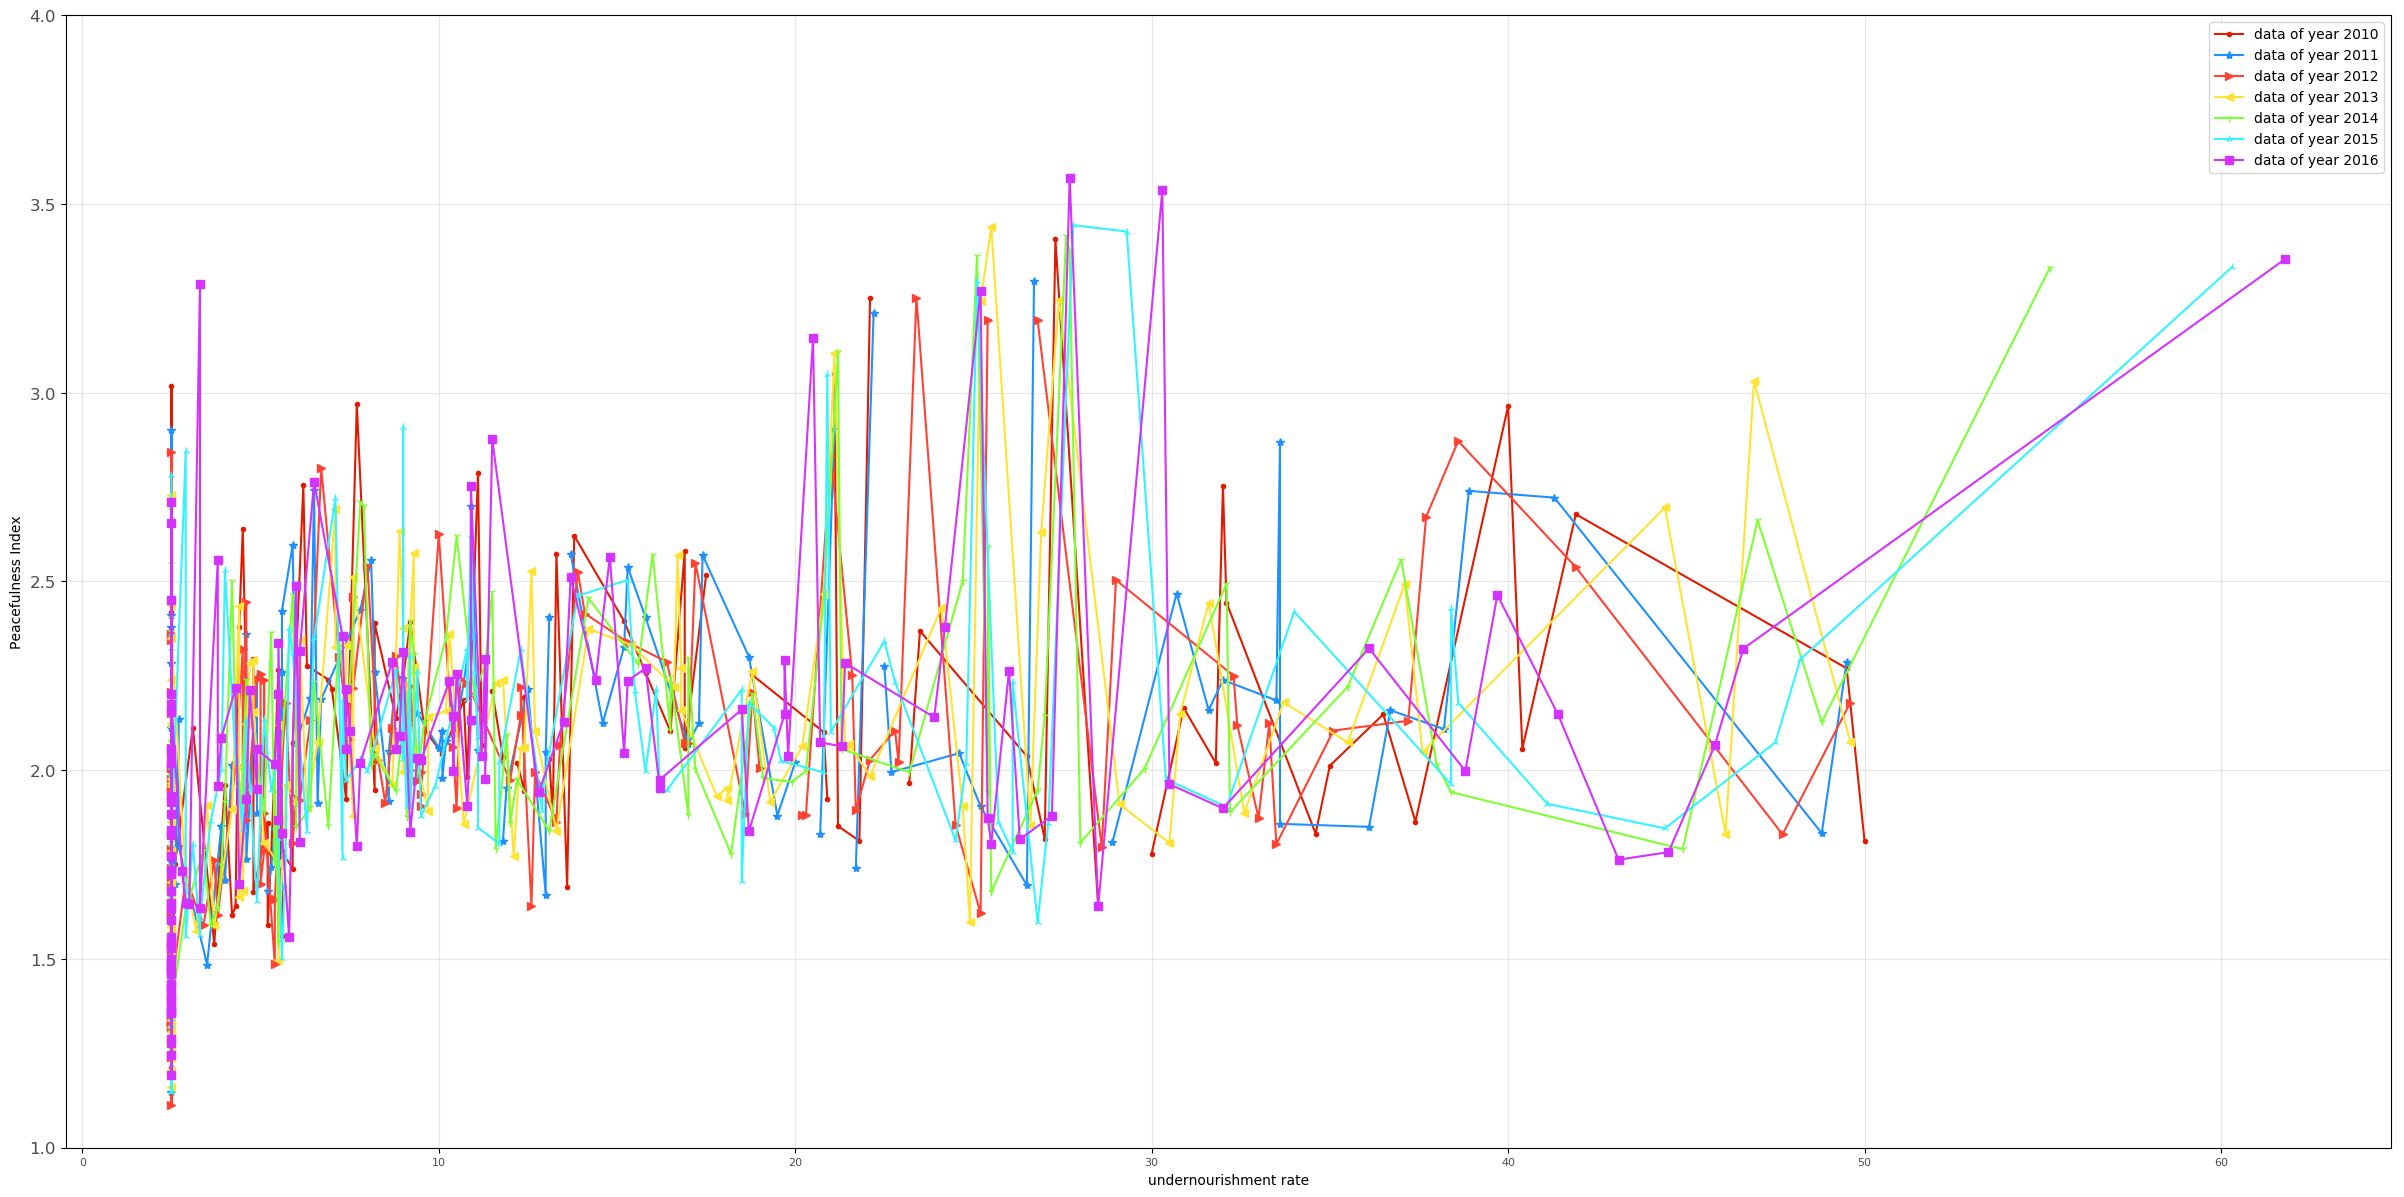

In [13]:
plot(x_list, y_list)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_cat(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    x_item = ['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)',
             '[45,50)','[50+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((11,2))
        for b in range(len(cc)):
            if cc[b] >= 0 and cc[b]<5:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 5 and cc[b]<10:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 10 and cc[b]<15:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 15 and cc[b]<20:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 20 and cc[b]<25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 25 and cc[b]<30:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 30 and cc[b]<35:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 35 and cc[b]<40:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 40 and cc[b]<45:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 45 and cc[b]<50:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
            if cc[b] >= 50:
                y_item[10][0] += cy[b]
                y_item[10][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][1][-4:], marker = marker[s],color = color[s])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(1.5,3.5)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

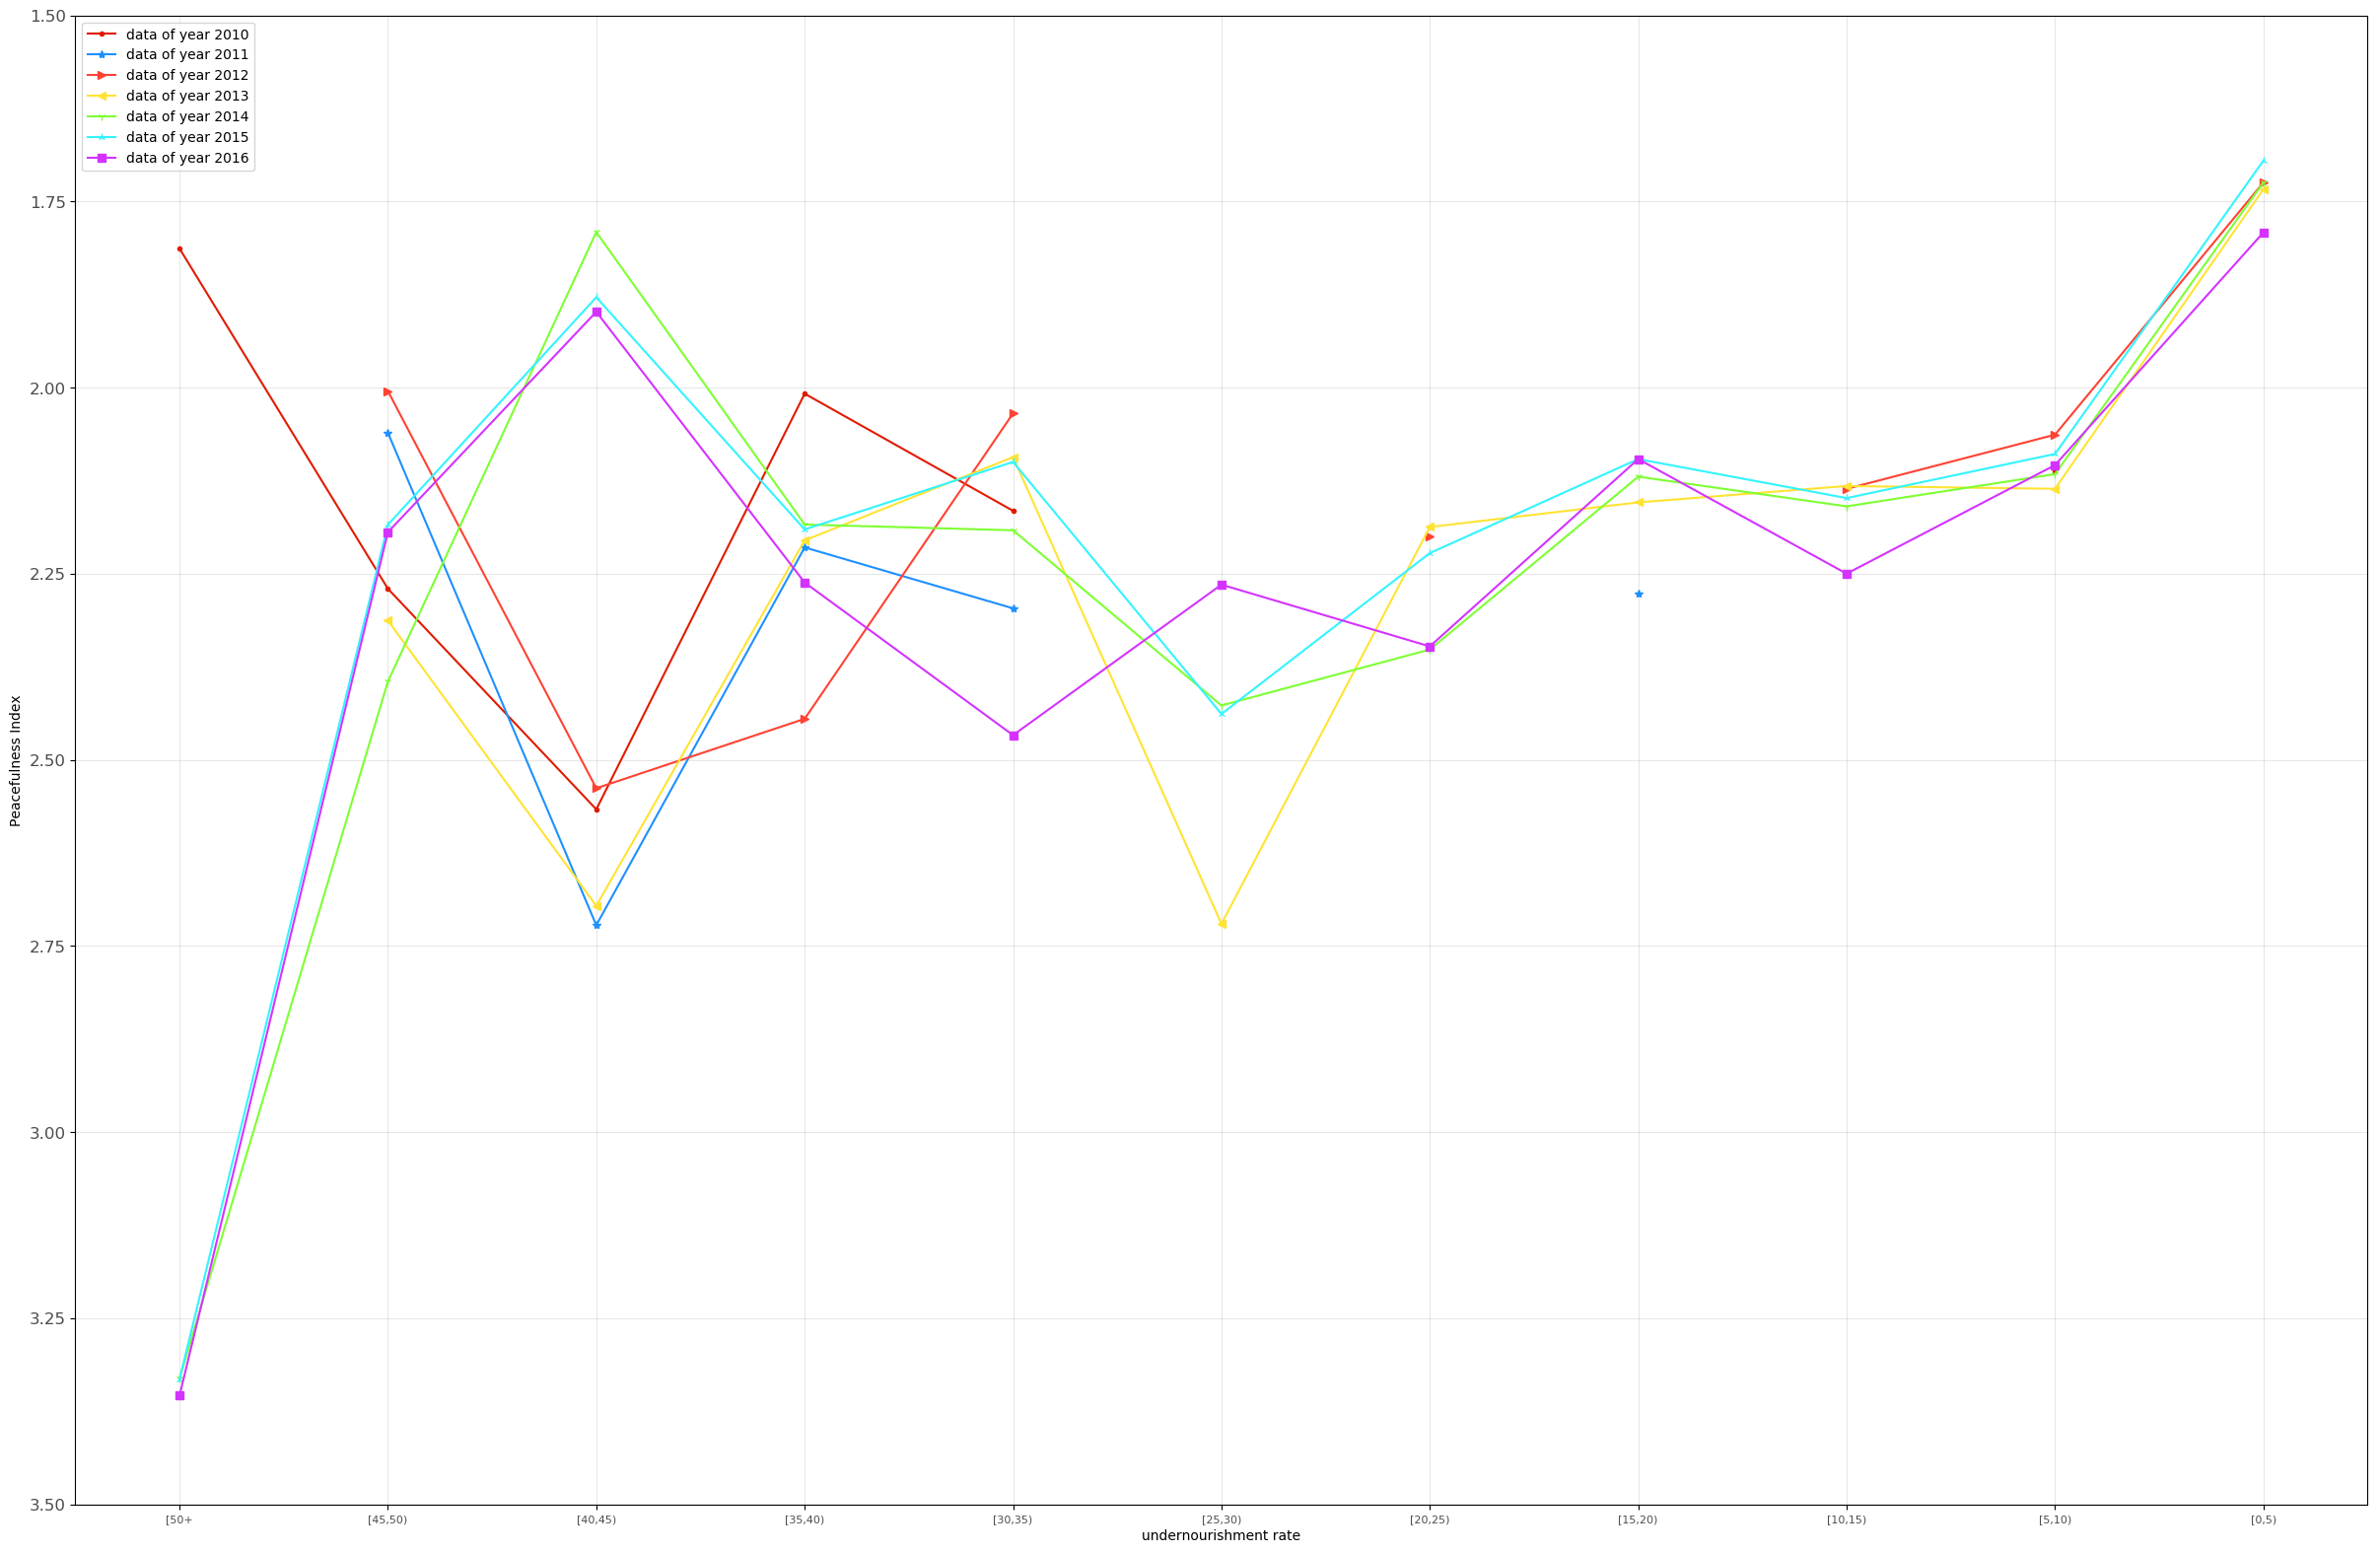

In [15]:
plot_cat(x_list, y_list)

In [16]:
married[married['Country or area'] == 'China']

,Country or area,ISO code,YearStart,YearEnd,Sex,AgeGroup,AgeStart,AgeEnd,DataValue,DataProcess,DataCatalog ShortName,DataCatalog ID,DataCatalog LongName,Data Source,Including_consensual_unions,Note on Data,Note on Country and Population
7207,China,156,1990,1990,Men,[15-19],15,19,1.78,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7208,China,156,1990,1990,Men,[20-24],20,24,37.26,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7209,China,156,1990,1990,Men,[25-29],25,29,82.43,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7210,China,156,1990,1990,Men,[30-34],30,34,91.42,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7211,China,156,1990,1990,Men,[35-39],35,39,92.34,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7212,China,156,1990,1990,Men,[40-44],40,44,91.93,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7213,China,156,1990,1990,Men,[45-49],45,49,90.65,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7214,China,156,1990,1990,Men,[50-54],50,54,89.06,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7215,China,156,1990,1990,Men,[55-59],55,59,86.72,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...
7216,China,156,1990,1990,Men,[60+],60,999,72.64,Census,1990 Census,1569,China 1990 Census,UNSD,NaN,NaN,Data pertain to civilian population of 30 prov...


In [17]:
def marital():
    file_path = "590PR_final_datasets"
    file_name = "UNdata_MARITAL_STATUS_2010-2013.csv"
    df = pd.read_csv(file_path + '/' + file_name)
    df.drop(df.tail(74).index,inplace=True)
    
    #     df.dropna(inplace=True)

    file_name = "UNdata_MARITAL_STATUS_2014-2017.csv"
    df2 = pd.read_csv(file_path + '/' + file_name)
    df2.drop(df2.tail(54).index,inplace=True)

    df_all = pd.concat([df, df2], axis= 0).reset_index(drop=True)
    return df_all

In [18]:
married = marital()

/Users/xy/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [92]:
married = marital()
married = married.astype({"Year": int}, copy = False)

# percent_married = pd.DataFrame()
def get_marriage_rate(married):
    percent_married = []
    for i in range(8):
        total = married.loc[(married['Marital status']=='Total') & (married['Age']=='Total')].groupby(['Year', 'Country or Area'], as_index=False).sum()
        single = married.loc[(married['Marital status']=='Single (never married)') & (married['Age']=='Total')].groupby(['Year', 'Country or Area'], as_index=False).sum()
        single_pop = single[single['Year'] == 2010+i].groupby(['Year', 'Country or Area']).sum()['Value']
        total_pop = total[total['Year'] == 2010+i].groupby(['Year', 'Country or Area']).sum()['Value']
        df1 = (total_pop-single_pop)/total_pop
        df = pd.concat([total_pop.to_frame().reset_index(),df1.to_frame().reset_index()['Value']],axis=1)
        df.columns = ['Year', 'Country', 'Total_pop', 'Marriage_Rate']
        percent_married.append(df)
    return percent_married


/Users/xy/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [93]:
percent_married = get_marriage_rate(married)

In [94]:
def getLevel2(percent_married):
    level2_list = []
    for i in range(8):
        df = percent_married[i]
        string = 'pi_'+str(2010+i)
        p1 = peace['Country']
        p2 = peace[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level2 = pd.merge(df, p, on = 'Country', how='inner')
        level2_list.append(df_level2)
    return level2_list

In [95]:
level2_list = getLevel2(percent_married)

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_level_2(level2_list):
    plt.figure(figsize = (30,15), dpi=100)
    marker = ['.','*','>','<','1','2','s','3','4']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF','#3351FF','#D433FF']
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
    for f in range(len(level2_list)):
        plt.plot(level2_list[f][pi_list[f]],level2_list[f]['Marriage_Rate'],label = 'data of year '+pi_list[f][-4:], marker = marker[f],color = color[f])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Marriage rate')
    #plt.ylim(0,1)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.show()

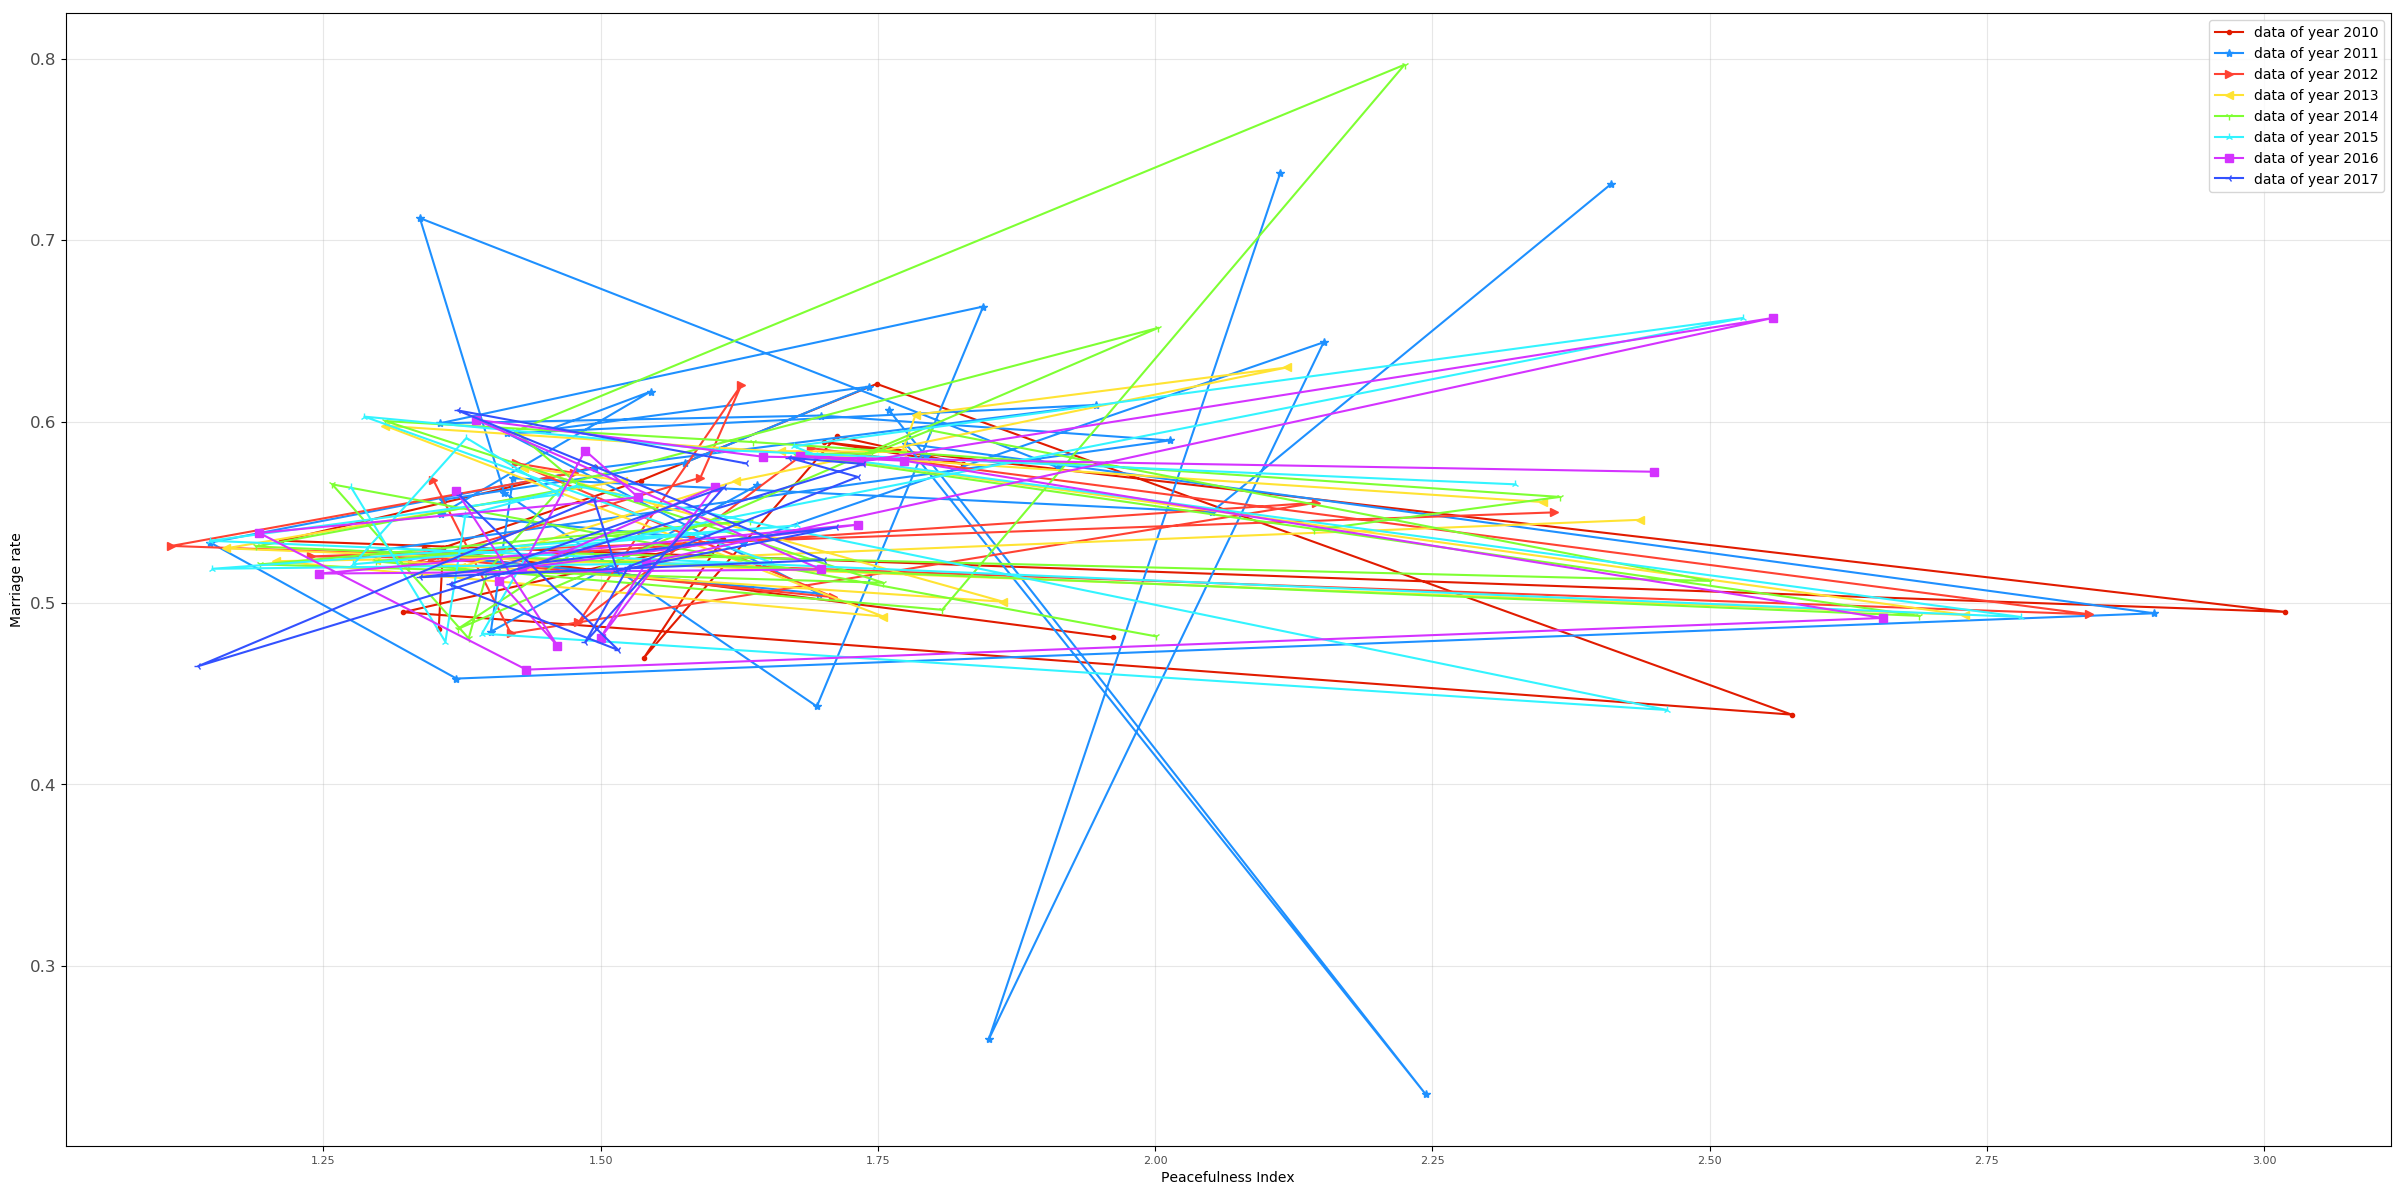

In [97]:
plot_level_2(level2_list)